In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('Retail_Sales_Beer_Liquor.csv')

In [32]:
df

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


In [33]:
df.rename(columns={'MRTSSM4453USN':'Sales'},inplace=True)

In [34]:
df.isnull().sum()

DATE     0
Sales    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    324 non-null    object
 1   Sales   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [36]:
df.DATE = pd.to_datetime(df.DATE,infer_datetime_format=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    324 non-null    datetime64[ns]
 1   Sales   324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [38]:
df.shape

(324, 2)

In [57]:
df

,Sales
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


In [39]:
df = df.set_index('DATE')

In [40]:
df.shape

(324, 1)

In [41]:
import matplotlib.pyplot as plt

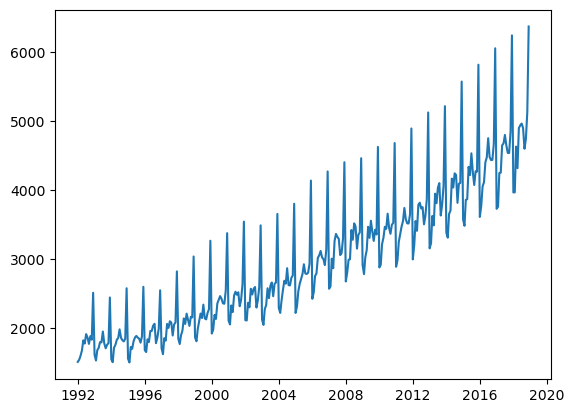

In [42]:
plt.plot(df['Sales'])

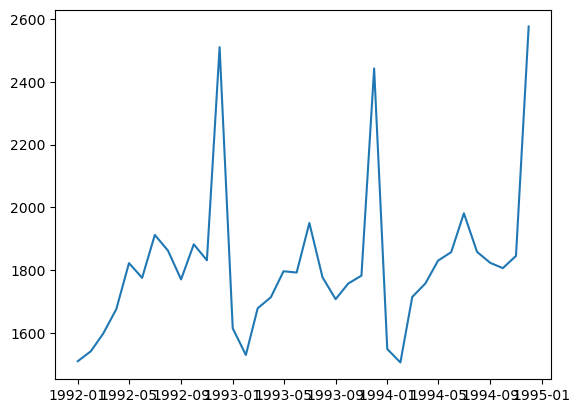

In [43]:
plt.plot(df['Sales'][0:36])  # check first 36 row for checking pattern

In [44]:
df1 = np.log(df)

<AxesSubplot:xlabel='DATE'>

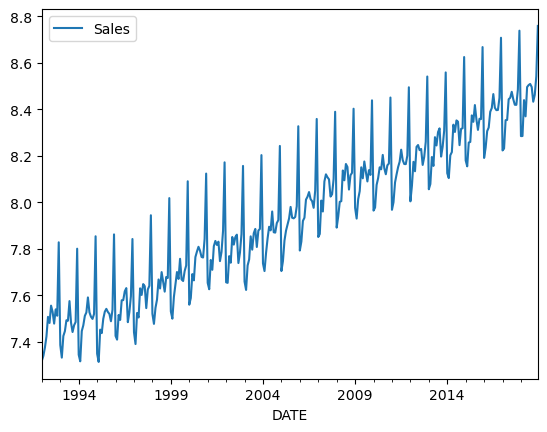

In [48]:
df1.plot()

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

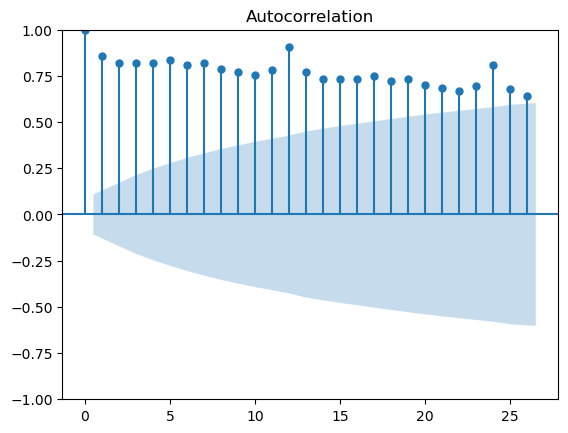

In [46]:
plot_acf(df1);

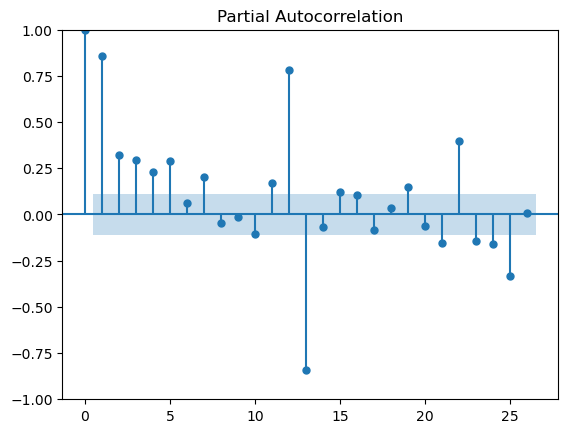

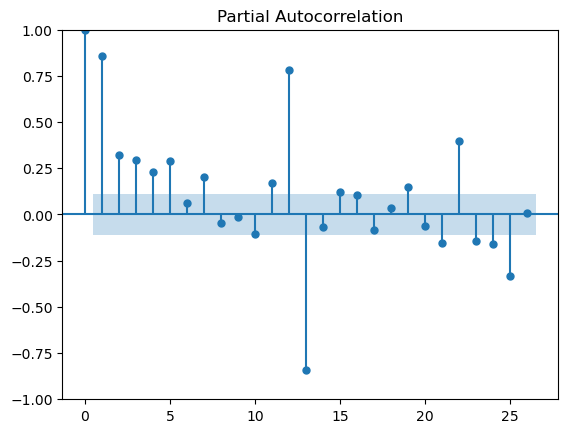

In [47]:
plot_pacf(df1)

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [50]:
dec_results = seasonal_decompose(df1)

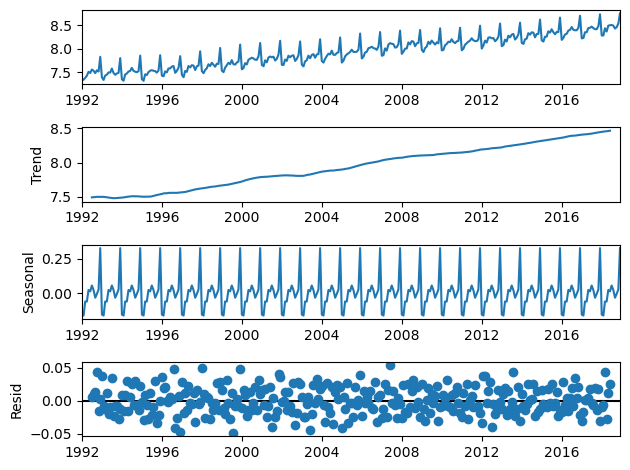

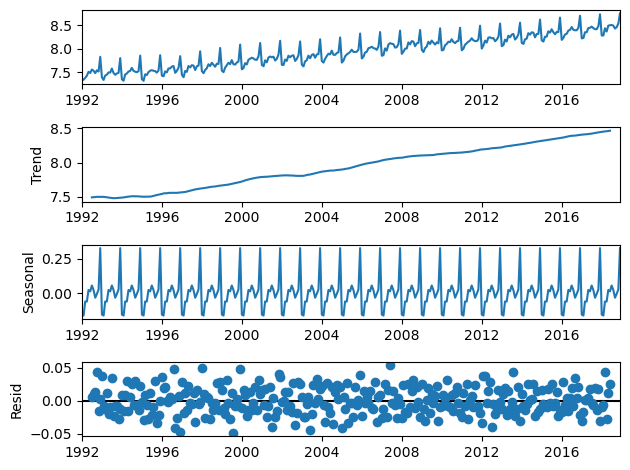

In [51]:
dec_results.plot()
# this is optional

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
auto_arima(df1,seasonal=True,m=12)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [54]:
model_sarima = SARIMAX(df1,order=(3, 0, 0),seasonal_order=(0, 1, 1, 12))

In [55]:
result_sales = model_sarima.fit()

In [66]:
pred_log = result_sales.predict(start = 324, end = 336)
#pred_log

In [67]:
pred_actualscale = np.round(np.exp(pred_log))

### Forecasting for 2019-20

In [68]:
pred_actualscale

2019-01-01    4125.0
2019-02-01    4175.0
2019-03-01    4562.0
2019-04-01    4590.0
2019-05-01    5043.0
2019-06-01    4994.0
2019-07-01    5221.0
2019-08-01    5057.0
2019-09-01    4801.0
2019-10-01    4943.0
2019-11-01    5168.0
2019-12-01    6761.0
2020-01-01    4258.0
Freq: MS, Name: predicted_mean, dtype: float64

<Figure size 1000x600 with 0 Axes>

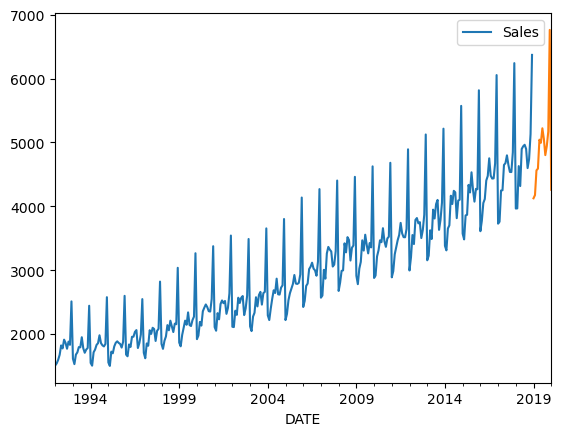

<Figure size 1000x600 with 0 Axes>

In [74]:
df.plot() # original data
pred_actualscale.plot() # predicted
plt.figure(figsize=(10,6))

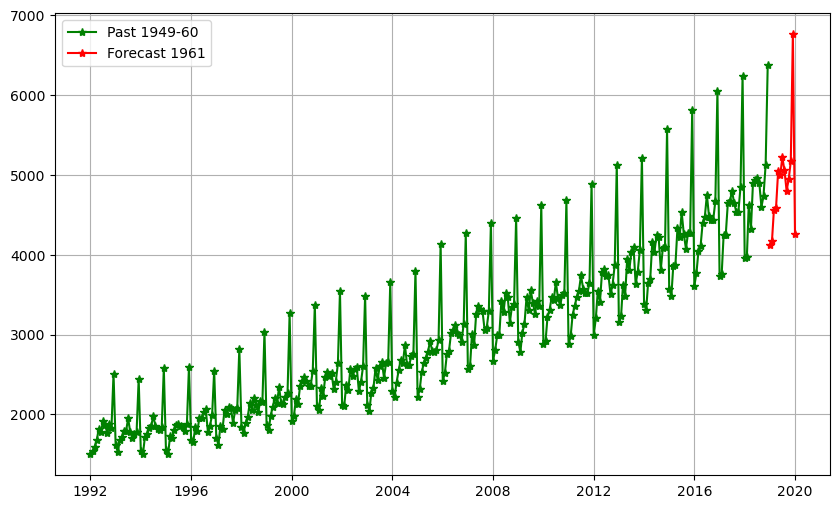

In [75]:
plt.figure(figsize=(10,6))
plt.plot(df.Sales, marker = "*",color = "green", label = 'Past 1949-60')
plt.plot(pred_actualscale,marker = "*",color = "red", label = 'Forecast 1961')
plt.legend()
plt.grid()

## Validation

In [76]:
df1_train = df1.iloc[0:312]
df1_test = df1.iloc[312:]

### Auto arima should be executed not on TRAIN but on full data

In [77]:
model_sarima_train = SARIMAX(df1_train, order=(3, 0, 0), seasonal_order=(0, 1, 1, 12))

In [78]:
result_sales_train = model_sarima_train.fit()

In [80]:
pred_log_train = result_sales_train.predict(start = 312, end = 324)

pred_log_train_actual_scale = np.exp(pred_log_train) #2018

In [81]:
# mse, rmse, mape

In [82]:
err = (df.iloc[312:].Sales - pred_log_train_actual_scale)

In [83]:
np.mean(np.abs(err*100/(df.iloc[132:].Sales)))

1.9580871649578524

In [84]:
pred_actual_df = pd.DataFrame()

In [85]:
pred_actual_df['Actual'] = df.iloc[312:].Sales
pred_actual_df['Pred'] = np.round(pred_log_train_actual_scale)

In [86]:
pred_actual_df

,Actual,Pred
DATE,,
2018-01-01,3965,3938.0
2018-02-01,3967,4007.0
2018-03-01,4629,4367.0
2018-04-01,4317,4416.0
2018-05-01,4897,4838.0
2018-06-01,4939,4781.0
2018-07-01,4963,5020.0
2018-08-01,4898,4860.0
2018-09-01,4598,4622.0


<AxesSubplot:xlabel='DATE'>

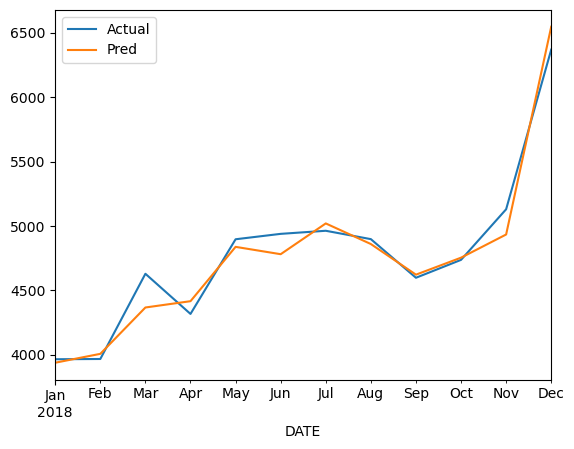

In [87]:
pred_actual_df.plot()